# TMDB Box Office Prediction

# I Executive Summary


The aim of this project is to predict international box office revenue for each movie.

Dataset is from the following link:

https://www.kaggle.com/competitions/tmdb-box-office-prediction/data

The project starts by reading train and test data. We found that there were 3000 rows and 23 features provided for train data and 4398 rows and 22 features provided for test data. The target feature "revenue" has been provided for the training dataset apart from the test dataset. Although, we found that the number of rows provided for the test dataset is larger than the training dataset, which is unusual but we choose to leave both datasets in their current state. Further analysis was performed for the "revenue" feature to check if the values are equally distributed. The train and test data are cleaned parallelly. Each feature present in the dataset is explored separately and analysis is done. After analysis, the feature is separated into different categories based on model training, log transformation, and features to drop.

The following steps are performed on features while exploration:
- Unpacking of messy data, eg. data stored in the form of {key: id}
- Locating missing values in the feature
- Applying to mean, median or mode based on analysis for filling in missing values in each column
- Checking the distribution of numerical features and storing them in the log transformation category if the distribution is skewed
- The categorical features were replaced with 0 for NA and 1 if the value is present and were stored in model training category

In order to evaluate how a model would perform on new data, the training data is then split into 80% train and 20% test data.

Three methods are used for model building and evaluation:
- Model 1: Random Forest Tree Regressor using all the predictors processed after exploratory analysis.
- Model 2: Sequential Feature Forward Selection and then using Random Forest Tree Regressor. The parameters of the Sequential forward feature selection used are root mean square log error and cross validation.
- Model 3: Sequential Feature Backward Selection and then using Random Forest Tree Regressor. Similar to Model 2, the parameters of the Sequential backward feature selection used are root mean square log error and cross validation.

Kaggle uses Root-Mean-Squared-Logarithmic-Error (RMSLE) metric between the predicted value and the actual revenue to evaluate score, so we will be genearting submission files for all 3 methods and check the score.

As we are trying to minimize RSMLE score, all three models performed good, but Model 1 performed the best out of all the regression models used to carry out this task resulting in the best submission score of 2.219 on Kaggle.

Kaggle Score with Model 2:

SCORE = 2.42939

Kaggle Score with Model 3:

SCORE = 2.33304



## Kaggle Score

### Model 1 - Random Forest Tree Regressor using all predictors
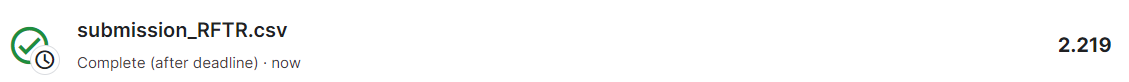

### Model 2 - Sequential Feature Forward Selection and then using Random Forest Tree Regressor
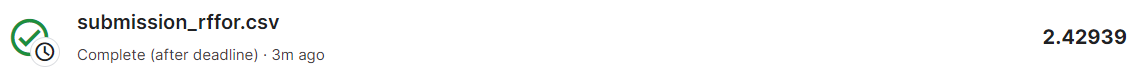

### Model 3 - Sequential Feature Backward Selection and then using Random Forest Tree Regressor
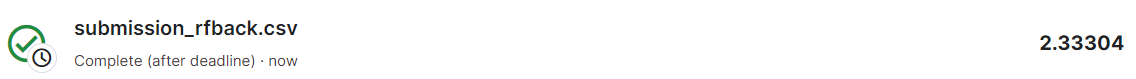

# II Ethics Discussion

This challenge was posted on Kaggle about four years ago, so we are a lot late. However, before discovering the dataset and challenge, we separately thought of the idea and decided it would be a fun challenge to present for the final project since it was already available to us. The ideas presented are just for showcasing different methods of model building and evaluation. It must not be used for the actual prediction of revenue for a movie.

The movie database given for the dataset ranges from over 1950 to 2015 film releases. The revenue given for old movies doesn't seem to be inflation adjusted by looking at the dataset. Also, over 800 movies in our training dataset had a budget of zero. This is highly impossible given that every film has a budget of some kind and that no movie is ever made without one. So, to summarize, the use of machine learning might impact on predicting international box office revenue for each movie.

The model will never be perfect because the bias is introduced during the handling of missing values. The majority of these missing value causes are unknown. Almost all of the missing values in the dataset were imputed using a variety of imputation methods. The use of machine learning to solve this TMDB Box Office Prediction Kaggle problem will have substantial ethical consequences because it will eventually determine international box office revenue for each movie.

The main goal of this Kaggle challenge raises ethical concerns due to the use of a machine learning algorithm, even though this is about predicting revenue of movie. If we were actually able to predict the revenue of a movie before the movie release, then the filmmakers would have done this before producing the movie. The movie's success depends on the audience watching the movie and not on the machine learning algorithm.

The coronavirus contributed to the growth of the wave of internet streaming services that are attracting an increasing number of movie users. The dataset used is before the global pandemic and not based on the recent study, so it would be interesting to look at how online streaming services have impacted on box office revenue.

The dataset for Kaggle Competition was acquired from The Movie Database(TMDB). The TMDB Open API was used to get the movie information, credits, and keywords. Although it makes use of the TMDB API, this Kaggle competition is not approved or authorized by TMDB. Therefore, the models and training approaches given are only meant to be used for learning data science and related topics, not for making predictions about the international box office revenue for each movie.

# III Detailed Report

## Import Libraries and Upload Files

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# Upload files to notebook

from google.colab import files
uploaded = files.upload()

# Link to download dataset: https://www.kaggle.com/competitions/tmdb-box-office-prediction/data
# Note : Upload train.csv, test.csv
# The total size of train.csv and test.csv is 67 MB

Saving test.csv to test.csv
Saving train.csv to train.csv


## Loading Dataset

The analysis begins by loading the test and train data. There are 3000 instances of train data and 4398 instances of test data.

In [ ]:
# Read .csv files for train and test data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(f"The (rows, features) of Train data are {train_data.shape}, & (rows, features) of Test data are {test_data.shape}")

The (rows, features) of Train data are (3000, 23), & (rows, features) of Test data are (4398, 22)


The target feature "revenue" is povided in train dataset apart from test dataset which is one column short. There are more rows in test dataset as compared to train dataset which is a bit unusual but we decided to keep both the dataset as it is.

In [ ]:
# Dataset Info

id = test_data["id"]
print("Check the datatypes of each variable:\n ")
train_data.info()

Check the datatypes of each variable:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime         

In [ ]:
# Check for NA values

print("Number of missing values in each features in train dataset: ")
print(train_data.isna().sum().sort_values(ascending=False))

print("\nNumber of missing values in each features in test dataset: ")
print(test_data.isna().sum().sort_values(ascending=False))

Number of missing values in each features in train dataset: 
belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
title                       0
status                      0
id                          0
release_date                0
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
revenue                     0
dtype: int64

Number of missing values in each features in test dataset: 
belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries     

## Explore the data


There are a total of 23 features in the dataset (including the revenue), so we will explore into each one. We will perform data analysis to add features that are best for for our model. The three list are created to store features that will be used later, features to perform log and features to drop.


In [ ]:
# list of feature stored for model training
feature_train = []

# list of feature stored to perform log
feature_log = []

# list of feature stored to drop
feature_to_drop = []

### Revenue

The target variable "revenue" is first analyzed. The avearge earning in revenue shows each movie is making almost 66 million dollars. After looking at distribution plot, we see that data is skewed to the right. This makes sense as there are lot of blockbuster movies which makes earnings in billion dollars. So to make distribution equal, log transformation has been carried out.

In [ ]:
# Check average earning in revenue

print("Avearge revenue: %f dollar" % train_data.revenue.mean())

Avearge revenue: 66725851.888667 dollar


Histogram plot of revenue: 


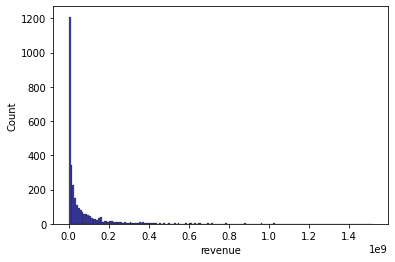

In [ ]:
# Histogram plot of revenue

print("Histogram plot of revenue: ")
sns.histplot(train_data.revenue, color='darkblue')

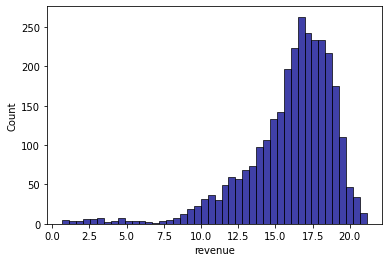

In [ ]:
# Log transformed histogram plot of revenue

sns.histplot(np.log1p(train_data.revenue), color='darkblue')

# Adding revenue in feature_log

feature_log.append("revenue")

### Belong to Collection

If the movie is listed in this feature, it means that it is a part of a series or collection of movies rather than being on its own. If a movie is a part of a collection, the collection is indicated in the variable as a string; otherwise, NA is displayed. To make the column easier to use, we will change it to be a 1 if the movie is in a collection and a 0 if it is not. Despite the numerous well-known film series, the majority of the films are independent, which is to be expected. A collection of films included 604 data points, or 20.1%, out of a total of 3000, while 2396 data points, or 79.9%, did not. As customers may be more willing to pay for a movie-going experience when it is the next instalment of a series they have already committed time and money in, belongs_to_collection feature has the potential to be a crucial factor for projecting revenue.

In [ ]:
# Replace NA to 0 and 1 if the movie is in collection

train_data.belongs_to_collection = train_data.belongs_to_collection.apply(lambda x: 1 if type(x) == str else 0)
test_data.belongs_to_collection = test_data.belongs_to_collection.apply(lambda x: 1 if type(x) == str else 0)

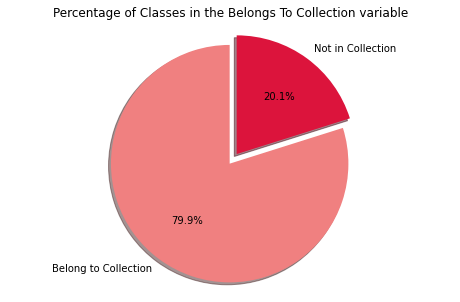

In [ ]:
# Pie Plot for belongs_to_collection feature

belongToCollection = train_data.belongs_to_collection.value_counts()
labels = 'Belong to Collection', 'Not in Collection'
sizes = belongToCollection.to_list()
explode = (0.1, 0)
colors = ['lightcoral', 'crimson']

plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of Classes in the Belongs To Collection variable')
plt.show()


# Adding belongs_to_collection in feature_train

feature_train.append('belongs_to_collection')


### Budget

The budget for the movie is shown in this feature as an estimate of revenue and expenses chosen for the movie. Intuitively, this looks like it may be a significant factor for estimating revenue because movies with higher production values and budgets are probably going to be more successful. However, this is undoubtedly not always the case and requires further investigation. Additionally, over 800 films in our training collection have a budget of 0. This is highly unlikely to be true because every movie that is made has a budget of some kind. It is more likely that the movies for which the budget could not be determined were replaced with 0. We will replace these 0 numbers with the median budget in order to clean up this data.

In [ ]:
# Check movies with budget listed as 0

print(f'Movies with budget listed as 0: {(train_data.budget == 0).sum()}')

Movies with budget listed as 0: 812


In [ ]:
# Replace 0 with median

median = train_data.loc[train_data['budget'] > 0, 'budget'].median()
train_data["budget"] = train_data["budget"].mask(train_data["budget"] == 0, median)
test_data["budget"] = test_data["budget"].mask(test_data["budget"] == 0, median)

After looking at distribution plot for budget feature, we see that data is skewed to the right for similar reasons to revenue. So to make distribution equal, log transformation has been carried out.

Histogram plot of budget: 


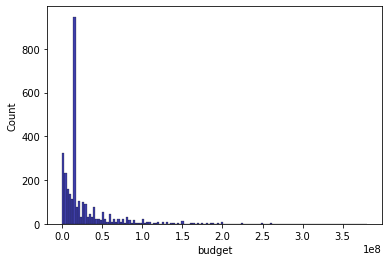

In [ ]:
# Histogram plot of budget

print("Histogram plot of budget: ")
sns.histplot(train_data.budget, color='darkblue')

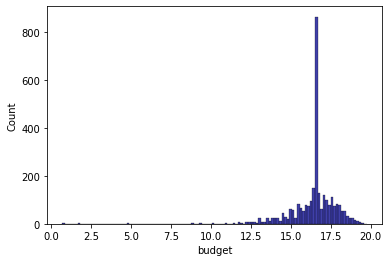

In [ ]:
# Log transformed histogram plot of budget

sns.histplot(np.log1p(train_data.budget), color='darkblue')

# Adding budget in feature_log

feature_log.append("budget")

### Genres

This feature shows the genres of a film. This could be an interesting feature to look because different genres may perform differently at the box office. There is a lot of unnecessary information and a lot of information in the genres features. In order to list the genres for each movie in a new column, we use a regular expression to extract the genre names. Additionally, we'll insert a blank string in place of the NA values. For easier data exploration, we will unpack all of the genres into a separate dataframe. To count the number of genres listed for a movie, we construct a new feature.

In [ ]:
# Inserting a blank string in place of the NA values

train_data['genres'] = train_data['genres'].fillna('')
train_data['genres'] = train_data['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

test_data['genres'] = test_data['genres'].fillna('')
test_data['genres'] = test_data['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))


In [ ]:
# function to separate each genre into its own set of columns

def separateVar(feature, data):
    for index in range(len(data)):
        for name in feature[index]:
            if name not in data.columns:
                data[name] = 0
            data[name][index] = 1
    return data

dataset = pd.DataFrame()
dataset = separateVar(train_data['genres'], train_data)

# new feature for a count of the number of genres

train_data['num_genres'] = train_data.genres.apply(lambda x: len(x))
test_data['num_genres'] = test_data.genres.apply(lambda x: len(x))


<ipython-input-17-10efdf4d19a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name][index] = 1


Below plot show that Drama, comedy, and thriller films should earn the most money overall. Since there are a lot of films in the Action and Adventure genres, it is possible to assume that these genres are more popular than others. Nevertheless, the significance of genre for determining a film's profitability (and therefore predicting future success) will be extremely useful. Hence, we will add "num_genres" feature in the training list.

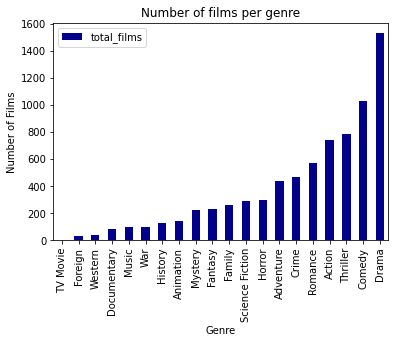

In [ ]:
# plotting genres in order of number of films
genresCol = dict()

for genre in dataset["genres"]:
    for element in genre:
        if element not in genresCol:
            genresCol[element] = 1
        else:
            genresCol[element] += 1

plot_genres = pd.DataFrame.from_dict(genresCol, orient='index')
plot_genres.columns = ["total_films"]
plot_genres = plot_genres.sort_values(by="total_films")
plot_genres.plot.bar(color='darkblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Genre")

# Adding num_genres in feature_log

feature_log.append("num_genres")

### Homepage

If the movie has a website, it is linked from this feature.
This feature seems interesting to look since there is a probability that more popular movies will have homepages. We won't be evaluating the homepage's content for this project because the homepage itself is not very useful to us because it is quite specific to each each film and is very one-of-a-kind. We will represent data based on whether or not a movie has a homepage.  

In [ ]:
# Replace NA to 0 and 1 if the movie has homepage

train_data.homepage = train_data.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
test_data.homepage = test_data.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)

We can observe that 2054, or 68.5%, of the 3000 datapoints in the train set, have no homepage. The remaining 946, or 31.5%, do have homepages, which might be related to the better-known or even higher-budget movies.
It is also possible that more films do, in fact, have homepages or websites, but that they are simply not included in the dataset because there is no way to distinguish between missing data and films without homepages since both are denoted by NA.

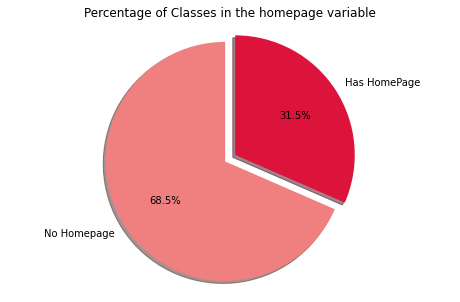

In [ ]:
# Pie Plot for homepage feature

homePage = train_data.homepage.value_counts()
labels = 'No Homepage', 'Has HomePage'
sizes = homePage.to_list()
explode = (0.1, 0)
colors = ['lightcoral', 'crimson']

plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of Classes in the homepage variable')
plt.show()


# Adding homepage in feature_train

feature_train.append('homepage')

### IMDb ID

The id for a movie on IMDb is displayed in this feature.
This id might be helpful if we wanted to extract more information from each movie's IMDb page, but that is outside the scope of this project which requires knowledge of web scraping. We don't actually use this feature for anything, and since it's only an identification number, no analysis will be performed and column will be dropped.

In [ ]:
# Add "imdb_id" in feature_to_drop list

feature_to_drop.append("imdb_id")

### Original Language

This feature represents the original language that the film was released in. We will create a new dummy variable "english_lang" that simply indicates whether the movie was released in English or not because from the following plot almost 2500 of the 3000 movies in the training data were initially produced in English, and all other languages made up only a small part of the movies. It appears that for our model, it is more crucial that the movie is not in English than that it is specifically in another language. Additionally, English-language movies bring in more money, so this would be a useful feature to have.

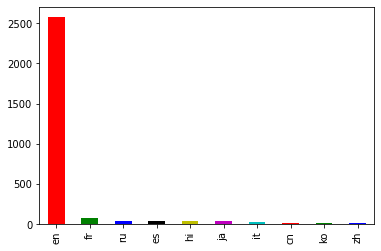

In [ ]:
# Plot showing counts of each original language

train_data['original_language'].value_counts()[:10].plot(kind="bar", color=list('rgbkymc'))

In [ ]:
# Creating new dummy variable

train_data['english_lang'] = train_data.original_language.apply(lambda x: 1 if x == 'en' else 0)
test_data['english_lang'] = test_data.original_language.apply(lambda x: 1 if x == 'en' else 0)

# Adding newly created english_lang in feature_train

feature_train.append('english_lang')


### Original Title

The movie's initial title is shown in this feature, most likely before it is made public. This feature is seems to be not useful to our model because there is another feature that contains the film's final title.
We were unable to identify any benefits of analysing this variable, so we will disregard it.

In [ ]:
# Add "original_title" in feature_to_drop list

feature_to_drop.append("original_title")

### Overview

The overview of a movie, which is only a general review of the movie's plot, is found in this feature. Although it could be interesting to evaluate the information in the overview, it is not possible to look all the content in it. We will drop this column as there seems to be no relation to providing revenue.

In [ ]:
# Add "overview" in feature_to_drop list

feature_to_drop.append("overview")

### Popularity

A measure of a movie's popularity is presented in this column, but it is not clear what this value implies because it doesn't correspond to any kind of standardised scale or rating. Given the significance of popularity for movie audience, popularity is expected to be a significant factor in predicting revenue outcome. It appears that the popularity can only be assessed after the movie has been released, so we will not be able to predict box office revenue. Hence, we decided the popularity feature will not be used into the model for this project.

In [ ]:
# Add "popularity" in feature_to_drop list

feature_to_drop.append("popularity")

### Poster Path

A link to the movie poster is located in this column.
Analyzing the content of movie posters is difficult for our project, although it could be fascinating to look at how they relate to revenue. Since we won't be examining the information found at the poster path, we will disregard this variable.  

In [ ]:
# Add "poster_path" in feature_to_drop list

feature_to_drop.append("poster_path")

### Production Companies

All of the production companies that contributed to each movie are included in this column. The data is a bit of a mess and needs some pre-processing, much like the genres column, so that we can better examine and work with it. We will only consider how many production studios worked on each movie. This might provide for a unique feature in our model.

In [ ]:
# Inserting a blank string in place of the NA values

train_data['production_companies'] = train_data['production_companies'].fillna('')
train_data['production_companies'] = train_data['production_companies'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

test_data['production_companies'] = test_data['production_companies'].fillna('')
test_data['production_companies'] = test_data['production_companies'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

# new column for a count of the number of production studios

train_data['num_studios'] = train_data.production_companies.apply(lambda x: len(x))
test_data['num_studios'] = test_data.production_companies.apply(lambda x: len(x))


From the below plot, only fewer films have more studio partners, and some even have no studio partners. The majority of movies have between one and four production studios (independent films). We will add "num_studios" to the feature log as from the plot, the data is skewed to the right.

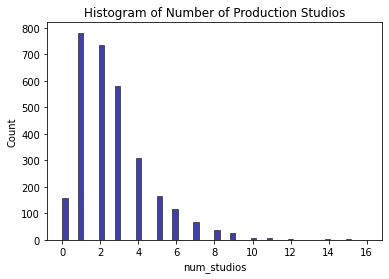

In [ ]:
# plotting films by number of production studios

sns.histplot(train_data['num_studios'], kde=False, color='darkblue')
plt.title('Histogram of Number of Production Studios')
plt.show();

# Adding num_studios in feature_log

feature_log.append("num_studios")

### Production Countries

The locations in which the film was made are listed in this column.
It can be interesting to look into the data here because movies are made all over the world, and some locations are more well-known for filming. Similar to genres and production_companies we have examined, the data in each row is highly disorganized.

In [ ]:
# Inserting a blank string in place of the NA values

train_data['production_countries'] = train_data['production_countries'].fillna('')
train_data['production_countries'] = train_data['production_countries'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

test_data['production_countries'] = test_data['production_countries'].fillna('')
test_data['production_countries'] = test_data['production_countries'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

The following plot reveals that the USA is classified as the country that produces the vast majority of movies, with the UK coming in second place and being far behind. In light of this discovery, we will instead develop a new column that indicates whether or not a movie was made in the USA rather than examining all of the different production countries.

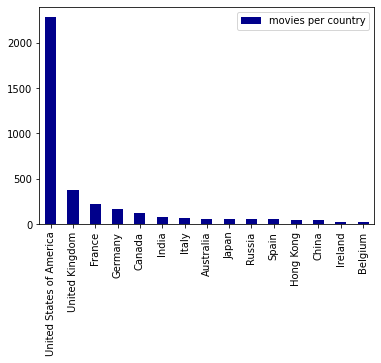

In [ ]:
prod_countries = dict()
for element in train_data["production_countries"].values:
    for country in element:
        if country not in prod_countries:
            prod_countries[country] = 1
        else:
            prod_countries[country] += 1

train_countries = pd.DataFrame.from_dict(prod_countries, orient='index', columns=["movies per country"])
train_countries.sort_values(by="movies per country", ascending=False).head(15).plot.bar(color='darkblue')

In [ ]:
#Creating new feature "production_usa"

train_data['production_usa'] = train_data.production_countries.apply(lambda x: 1 if 'United States of America' in x else 0)
test_data['production_usa'] = test_data.production_countries.apply(lambda x: 1 if 'United States of America' in x else 0)

# Adding production_usa in feature_train

feature_train.append("production_usa")

### Release Date

The release date of the movie in theatres is shown in this column. The release data is be used to refer information about day of the weekin which movie was released that may have an impact on how well a movie performs in theatres. Although the feature seems to be a column of dates in a conventional format, we will need to break this up considerably to extract all the information we need, so we begin with some pre-processing using datetime for data manipulation.

Text(0.5, 1.0, 'Release Date Day of the Week')

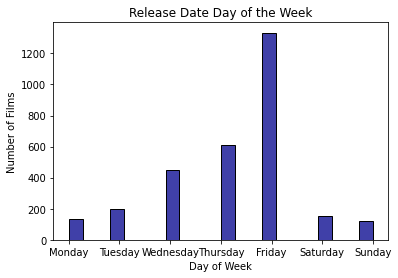

In [ ]:
# converting to datetime format
train_releasedata = pd.to_datetime(train_data['release_date'])

# plotting the films release day of the week
fig, ex = plt.subplots()
sns.histplot(train_releasedata.dt.dayofweek, kde=False, color='darkblue')

labels = [item.get_text() for item in ex.get_xticklabels()]
labels[1] = 'Monday'
labels[2] = 'Tuesday'
labels[3] = 'Wednesday'
labels[4] = 'Thursday'
labels[5] = 'Friday'
labels[6] = 'Saturday'
labels[7] = 'Sunday'

ex.set_xticklabels(labels)
ex.set_xlabel("Day of Week")
ex.set_ylabel("Number of Films")
ex.set_title("Release Date Day of the Week")

A outlier in the dayofweek data for Friday release days can be seen, which is due to the conclusion of the typical five-day workweek that runs from Monday through Friday. If there are less commitments the next day, people are more inclined to attend a multi-hour event after work.
It is thought that a movie's release will follow market trends that the picture would find most advantageous, hence it is assumed that Friday release dates will boost sales. Unexpectedly, Saturday release dates are lower than Tuesday, Wednesday, and Thursday, despite the fact that it would seem logical to expect a large audience to attend a Saturday show.

In [ ]:
# fill NA values with the mode

train_data["release_date"] = train_data["release_date"].fillna(train_data["release_date"].mode()[0])
test_data["release_date"] = test_data["release_date"].fillna(train_data["release_date"].mode()[0])

# Create Temp Variable
train_data['temp'] = train_data.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
test_data['temp'] = test_data.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

# Create Month Variable
train_data["month"] = train_data.temp.apply(lambda x: x.month)
test_data["month"] = test_data.temp.apply(lambda x: x.month)

# Create Year Variable
train_data["year"] = train_data.temp.apply(lambda x: x.year)
test_data["year"] = test_data.temp.apply(lambda x: x.year)

# Create Day of Week Variable
train_data["day_of_week"] = train_data.temp.apply(lambda x: x.weekday()+1)
test_data["day_of_week"] = test_data.temp.apply(lambda x: x.weekday()+1)

# Create Wek of Year Variable
train_data["week_of_year"] = train_data.temp.apply(lambda x: x.isocalendar()[1])
test_data["week_of_year"] = test_data.temp.apply(lambda x: x.isocalendar()[1])

# Dropping Temp Variable
train_data = train_data.drop(['temp'], axis=1)
test_data = test_data.drop(['temp'], axis=1)

train_data["day_of_week"] = train_data["day_of_week"].fillna(train_data["day_of_week"].mode()[0])
test_data["day_of_week"] = test_data["day_of_week"].fillna(train_data["day_of_week"].mode()[0])

train_data["year"] = train_data["year"].fillna(train_data["year"].mode()[0])
test_data["year"] = test_data["year"].fillna(train_data["year"].mode()[0])

train_data["month"] = train_data["month"].fillna(train_data["month"].mode()[0])
test_data["month"] = test_data["month"].fillna(train_data["month"].mode()[0])

train_data["week_of_year"] = train_data["week_of_year"].fillna(train_data["week_of_year"].mode()[0])
test_data["week_of_year"] = test_data["week_of_year"].fillna(train_data["week_of_year"].mode()[0])

train_data[["release_date", "month", "year", "day_of_week", "week_of_year"]].head()

,release_date,month,year,day_of_week,week_of_year
0,2/20/15,2,2015,5,8
1,8/6/04,8,2004,5,32
2,10/10/14,10,2014,5,41
3,3/9/12,3,2012,5,10
4,2/5/09,2,2009,4,6


The day of the week when movies are most frequently released is Friday, as we already observed, but on average, this was not the day with the biggest revenue. Therefore, since each day of the week may be beneficial to the model in a different way, we can develop a feature for each of them.

In [ ]:
# Creating new dummy variables according to the release of week

train_data['monday'] = train_data.day_of_week.map(lambda x: 1 if (x == 1) else 0)
test_data['monday'] = test_data.day_of_week.map(lambda x: 1 if (x == 1) else 0)

train_data['tuesday'] = train_data.day_of_week.map(lambda x: 1 if (x == 2) else 0)
test_data['tuesday'] = test_data.day_of_week.map(lambda x: 1 if (x == 2) else 0)

train_data['wednesday'] = train_data.day_of_week.map(lambda x: 1 if (x == 3) else 0)
test_data['wednesday'] = test_data.day_of_week.map(lambda x: 1 if (x == 3) else 0)

train_data['thursday'] = train_data.day_of_week.map(lambda x: 1 if (x == 4) else 0)
test_data['thursday'] = test_data.day_of_week.map(lambda x: 1 if (x == 4) else 0)

train_data['friday'] = train_data.day_of_week.map(lambda x: 1 if (x == 5) else 0)
test_data['friday'] = test_data.day_of_week.map(lambda x: 1 if (x == 5) else 0)

train_data['saturday'] = train_data.day_of_week.map(lambda x: 1 if (x == 6) else 0)
test_data['saturday'] = test_data.day_of_week.map(lambda x: 1 if (x == 6) else 0)

train_data['sunday'] = train_data.day_of_week.map(lambda x: 1 if (x == 7) else 0)
test_data['sunday'] = test_data.day_of_week.map(lambda x: 1 if (x == 7) else 0)

# Adding release of week variables in feature_train

feature_train.append('monday')
feature_train.append('tuesday')
feature_train.append('wednesday')
feature_train.append('thursday')
feature_train.append('friday')
feature_train.append('saturday')
feature_train.append('sunday')


### Runtime

The movie's runtime, also known as duration or length, is displayed in this column in minutes. The duration of a film may have an effect on its box office performance since 'too short' or 'too long' films may draw in fewer spectators. This may potentially spark an intriguing conversation about how long people can focus while viewing a movie, but that is not taken into account in this analysis.

In [ ]:
#pre-processing
train_data.runtime = train_data.runtime.fillna(train_data.runtime.median())
test_data.runtime = test_data.runtime.fillna(test_data.runtime.median())


median = train_data.loc[train_data['runtime'] > 0, 'runtime'].median()
train_data["runtime"] = train_data["runtime"].mask(train_data["runtime"] == 0, median)
test_data["runtime"] = test_data["runtime"].mask(test_data["runtime"] == 0, median)

Histogram plot of runtime: 


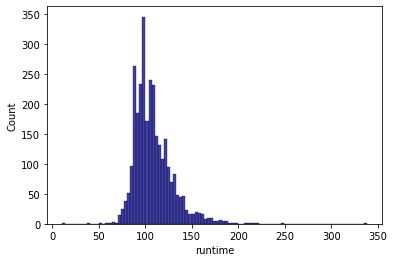

In [ ]:
# Histogram plot of runtime

print("Histogram plot of runtime: ")
sns.histplot(train_data.runtime, color='darkblue')

Although there are quite a few outliers to the right, the runtime distribution appears to be generally favourable.
These outliers will be addressed through log transformation.
Now, from follwing the distribution, especially the log-transformed distribution, appears even cleaner. Working with this will be lot better.

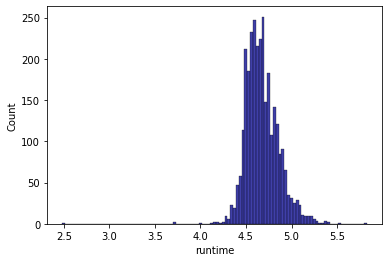

In [ ]:
# Log transformed histogram plot of runtime

sns.histplot(np.log1p(train_data.runtime), color='darkblue')

# Adding revenue in feature_log

feature_log.append("runtime")

### Spoken Languages

This column lists every language in which a movie has been released. This is significant to us because if a movie is released in a variety of languages, it may be seen by more people and earn more money. Let's investigate the spoken languages further because it may potentially be a significant factor.

In [ ]:
# new column for a count of the number of spoken languages
train_data.spoken_languages = train_data.spoken_languages.fillna("")
train_data['spoken_languages'] = train_data['spoken_languages'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))
train_data['total_languages'] = train_data.spoken_languages.apply(lambda x: len(x))


test_data.spoken_languages = test_data.spoken_languages.fillna("")
test_data['spoken_languages'] = test_data['spoken_languages'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))
test_data['total_languages'] = test_data.spoken_languages.apply(lambda x: len(x))

From the below plot, it is clear that most of the films are released between 1 to 2 languages. We will add total_languages feature in feature_log for model training as the distribution tends to be skewed right.

Histogram plot of total_languages: 


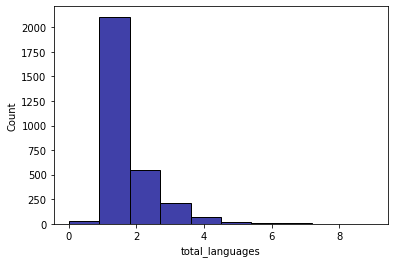

In [ ]:
# Histogram plot of total_languages

print("Histogram plot of total_languages: ")
sns.histplot(train_data.total_languages, color='darkblue', bins=10)

# Adding total_languages in feature_log

feature_log.append("total_languages")

### Status

This variable is not particularly relevant because all but 4 of the training set's movies have already been made and distributed. Additionally, regardless of whether the film is released or not, our model aims to accurately predict box office revenue. The release status is not informative, thus we will remove this column. The model will be trained on already released movies.

In [ ]:
# check status feature

print(train_data.status.value_counts())

# Add "status" in feature_to_drop list

feature_to_drop.append("status")

Released    2996
Rumored        4
Name: status, dtype: int64


### Tagline

The tagline of a movie, often known as the mantra or a catchphrase intended to characterise the film, is presented in this column.
For some types of studies, the tagline's content might be worthwhile to examine. Instead of examining the content, we will simply determine whether or not the film has a tagline.

In [ ]:
# Replace NA to 0 and 1 if the movie has tagline

train_data['tagline_check'] = train_data.tagline.apply(lambda x: 1 if type(x) == str else 0)
test_data['tagline_check'] = test_data.tagline.apply(lambda x: 1 if type(x) == str else 0)


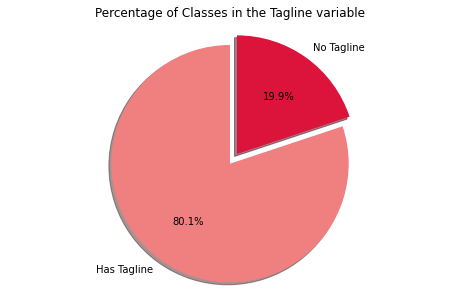

In [ ]:
# Pie Plot for tagline feature

taglineData = train_data.tagline_check.value_counts()
labels = 'Has Tagline', 'No Tagline'
sizes = taglineData.to_list()
explode = (0.1, 0)
colors = ['lightcoral', 'crimson']

plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of Classes in the Tagline variable')
plt.show()


# Adding tagline_check in feature_train

feature_train.append('tagline_check')

### Title

In comparison to the "original title" column, this one features a film's title and appears to be considerably more helpful. We'll merely be focusing on the title's length to determine if it affects how many people watch a movie. Longer titles may be more intriguing and captivating than shorter ones, drawing in a larger audience, or shorter titles may be easier to remember and perform better. Let's examine the facts and find out.

In [ ]:
# Add title length feature
train_data['length_title'] = train_data.title.apply(lambda x: len(str(x)))
test_data['length_title'] = test_data.title.apply(lambda x: len(str(x)))

After looking at distribution plot for title feature, we see that data is skewed to the right due to the fact that most of the movie producers keep title short to attract audience. So to make distribution equal, log transformation has been carried out.

Histogram plot of budget: 


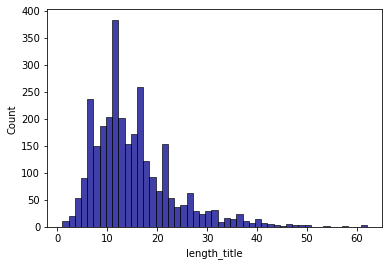

In [ ]:
# Histogram plot of length_title

print("Histogram plot of budget: ")
sns.histplot(train_data.length_title, color='darkblue')

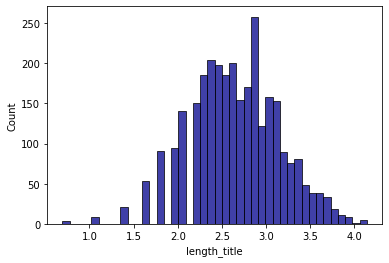

In [ ]:
# Log transformed histogram plot of length_title

sns.histplot(np.log1p(train_data.length_title), color='darkblue')

# Adding budget in feature_log

feature_log.append("length_title")

### Keywords

The keywords column contains the keywords for a movie, which are probably intended to be used as search phrases for important ideas in the movie to define it. Once more, we won't be analysing the words themselves; rather, we'll merely look for keywords. Having keywords increases a movie's searchability and accessibility, which may lead to more people discovering the film and higher sales.

In [ ]:
# Replace NA to 0 and 1 if the movie has keywords

train_data['has_keywords'] = train_data.Keywords.apply(lambda x: 1 if type(x) == str else 0)
test_data['has_keywords'] = test_data.Keywords.apply(lambda x: 1 if type(x) == str else 0)

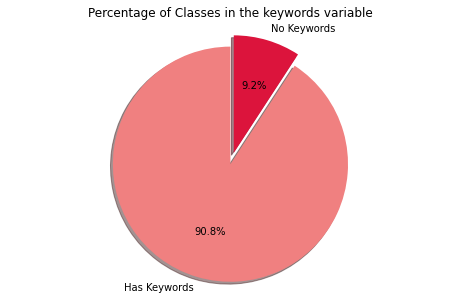

In [ ]:
# Pie Plot for keywords feature

keywordsCol = train_data.has_keywords.value_counts()
labels = 'Has Keywords', 'No Keywords'
sizes = keywordsCol.to_list()
explode = (0.1, 0)
colors = ['lightcoral', 'crimson']

plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of Classes in the keywords variable')
plt.show()


# Adding has_keywords in feature_train

feature_train.append('has_keywords')

### Cast

The whole cast of the film is listed in the cast column. The cast is made up of every character that appears in the movie. We will investigate this variable and come up with a means to put a number on the cast members.

In [ ]:
# Inserting a blank string in place of the NA values

train_data.cast = train_data.cast.fillna("")
train_data['cast'] = train_data['cast'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

test_data.cast = test_data.cast.fillna("")
test_data['cast'] = test_data['cast'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

# Create Total Cast Feature

train_data['total_cast'] = train_data['cast'].apply(lambda x: len(x))
test_data['total_cast'] = test_data['cast'].apply(lambda x: len(x))

median = train_data.loc[train_data['total_cast']> 0, 'total_cast'].median()
train_data["total_cast"] = train_data["total_cast"].mask(train_data["total_cast"] == 0, median)
test_data["total_cast"] = test_data["total_cast"].mask(test_data["total_cast"] == 0, median)

After looking at distribution plot for total cast feature, we see that data is skewed to the right due to the fact that most of the movie cast hires less members. So to make distribution equal, log transformation has been carried out.

Histogram plot of total_cast: 


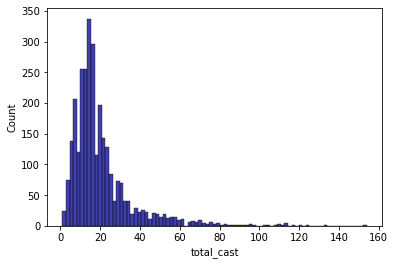

In [ ]:
# Histogram plot of total_cast

print("Histogram plot of total_cast: ")
sns.histplot(train_data.total_cast, color='darkblue')

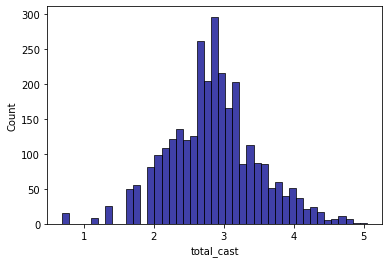

In [ ]:
# Log transformed histogram plot of total_cast

sns.histplot(np.log1p(train_data.total_cast), color='darkblue')

# Adding budget in feature_log

feature_log.append("total_cast")

### Crew

The whole list of the crew members who worked on each movie is contained in this column. Directors, producers, the makeup team, visual effects artists, composers, and many other people play a variety of jobs on the crew that come together to make a movie. Considering the audience, they are mostly interested in Cast and plot of the movie, so we will neglect this feature for our analysis.

In [ ]:
# Add "crew" in feature_to_drop list

feature_to_drop.append("crew")

## Data Preprocessing

Let's examine the outcomes and obtain our final set of features now that we have explored all of the data, created a drop feature list and added a number of additional features. All of the dummy variables are stored in feature_train list and will be employed in our model, and all of the numerical features which are stored in feature_log list need to be log transformed. We will log transform the feature_log list and include them in the feature_train list we have for our model. In the end, our model had a total of 20 distinct features.

In [ ]:
# Perform log transform and add to the dataset

for feature in feature_log:
    train_data[feature + "_log"] = np.log1p(train_data[feature])
    if feature != "revenue":
        test_data[feature + "_log"] = np.log1p(test_data[feature])
        feature_train.append(feature + "_log")


In [ ]:
# Total Features selected for final model

print("Number of features: ", len(feature_train))

Number of features:  20


In [ ]:
# Create train dataset, test dataset from selected features and target variable

train = train_data[feature_train]
y_train = train_data['revenue_log']
test = test_data[feature_train]

train.head()

,belongs_to_collection,homepage,english_lang,production_usa,monday,tuesday,wednesday,thursday,friday,saturday,sunday,tagline_check,has_keywords,budget_log,num_genres_log,num_studios_log,runtime_log,total_languages_log,length_title_log,total_cast_log
0,1,0,1,1,0,0,0,0,1,0,0,1,1,16.454568,0.693147,1.386294,4.543295,0.693147,3.135494,3.218876
1,1,0,1,1,0,0,0,0,1,0,0,1,1,17.504390,1.609438,0.693147,4.736198,0.693147,3.713572,3.044522
2,0,1,1,1,0,0,0,0,1,0,0,1,1,15.009433,0.693147,1.386294,4.663439,0.693147,2.197225,3.931826
3,0,1,0,0,0,0,0,0,1,0,0,0,1,13.997833,1.098612,0.000000,4.812184,1.098612,2.079442,2.079442
4,0,0,0,0,0,0,0,1,0,0,0,0,0,16.588099,1.098612,0.000000,4.779123,0.693147,2.397895,1.609438


## Models

We have split train data considering 80% train and 20% test for modelling. There was no obvious reason to select 20% test, just wanted to make sure that we have enough test data to perform analysis on predicted results. Random State is set at number 42 so that at every run the predicted results will be same. Reason for selecting number 42 is just random and it has nothing to do with any logic.

As this is a regression prolem, model performance is evaluated using the distribution of Residual plot. The root mean squared error metric is evaluated to show how our model has performed on the test dataset.

Three methods are performed for model build and evaluation:
- Random Forest Tree Regressor using all the predictors we processed after exploratory analysis.
- Sequential Feature Forward Selection and then using Random Forest Tree Regressor.
- Sequential Feature Backward Selection and then using Random Forest Tree Regressor.

Note: We decided to keep the n_estimators to be equal 10 which is the number of trees used in random forest, default is 100, but the idea was dropped due to RSME being increased. Also, we checked by keeping max_depth to 2 which is the maximum depth of tree to avoid overfitting but this idea was also dropped due to RSME being increased on the test data.

In [ ]:
# Split the dataset into training and testing sets, with a ratio of 80% and 20% respectively.
X_train, X_test, y_train, y_test = train_test_split(train,
                                                    y_train,
                                                    test_size = 0.2,
                                                    random_state = 42)


In [ ]:
# Model Evaluation Metrics

def metric(y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('Root Mean Squared Error: ', round(rmse, 4))

### Random Forest Tree Regressor using all the predictors

#### Model Build and Evaluation

The model build process is done with Random Forest Tree Regressor. All the  predictors are used which was evaluated after data exploration. The Residual plot was drawn which is used to determine how successfully our RFTR model have distributed from the points close to zero. Looking at the plot and RMSE value, our model performed good but can be improved because there are lot of outliers.

In [ ]:
# RFTR Model Fitting

model_RFTR = RandomForestRegressor(random_state = 42)
model_RFTR.fit(X_train, y_train.values.ravel())

# Prediction on test set

y_pred_RFTR = model_RFTR.predict(X_test)
metric(y_pred_RFTR, y_test)

Root Mean Squared Error:  2.1788


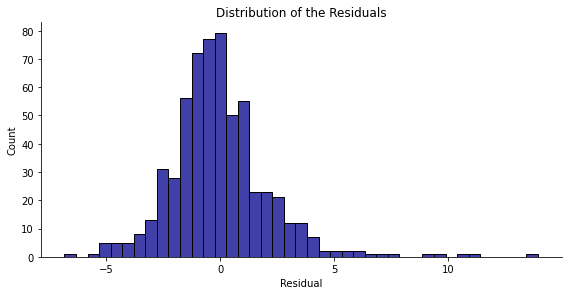

In [ ]:
# Plot for Distribution of residuals

sns.displot(y_pred_RFTR - y_test, color = "darkblue", aspect = 2, height = 4)
plt.title('Distribution of the Residuals')
plt.xlabel('Residual')
plt.show()

#### Prediction on final test set for Kaggle

In [ ]:
# Predict on final test dataset for kaggle
pred_RFTR = model_RFTR.predict(test)

In [ ]:
# Prepare .csv file according to kaggle evaluation
final = pd.DataFrame()
final['id'] = id
final['revenue'] = np.expm1(pred_RFTR)
final.to_csv('submission_RFTR.csv', index=False)

Kaggle Submission Score
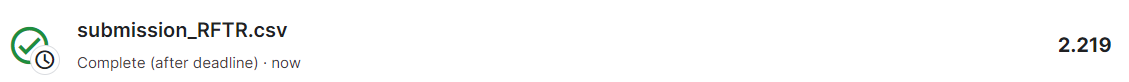


### Sequential Feature Forward Selection and Random Forest Tree Regressor

The forward feature selection for Random Forest Tree Regressor is carried out using Sequential forward Feature Selection library wrapper from scikit-learn. It was found that 10 features were selected after performing wrapper method and scoring was kept as root mean square log error and cross-validation to 5 while selection of features. The root mean square log error is kept as scoring parameter because Kaggle uses the RMSLE metric between the predicted value and the actual revenue to evaluate the score. The train and test data for RFTR were separated based on the feature selected by forward feature selection.

In [ ]:
# Object for Sequential forward feature selection
sfsf = SFS(RandomForestRegressor(random_state=42), direction='forward',
            scoring='neg_mean_squared_log_error', cv=5)

# Fit RFTR Sequential forward Feature Selection on training data
features_rftrf = sfsf.fit(X_train, y_train)

# Note: It takes 4-5 min to fit the model,
# timing can be minimized by keeping n_estimators and max_depth less, but it increased the RSME score

In [ ]:
# Get indices of features selected for RFTR Forward
rftrf_feature_indices = features_rftrf.get_support(indices = True)
X_train_rftrf = X_train.iloc[ : , rftrf_feature_indices]
X_test_rftrf = X_test.iloc[ : , rftrf_feature_indices]

rftrf_feature_cols = X_train_rftrf.columns
print(f'Features selected for RFTR Forward: {rftrf_feature_cols}')
test_rftrf = test.iloc[ : , rftrf_feature_indices]

Features selected for RFTR Forward: Index(['belongs_to_collection', 'production_usa', 'monday', 'tuesday',
       'wednesday', 'friday', 'sunday', 'tagline_check', 'has_keywords',
       'budget_log'],
      dtype='object')


#### Model Build and Evaluation

The model build process is done with Random Forest Tree Regressor. Only the predictors selected after forward feature selection are used. Similar to Model 1, looking at the plot and RMSE value, our model can be improved because there are lot of outliers. We will be moving further to see if model can be approved by using Backward Feature Selection.

In [ ]:
# RFTR Forward Model Fitting

model_RFTRF = RandomForestRegressor(random_state=42)
model_RFTRF.fit(X_train_rftrf, y_train)

# Prediction on test set

y_pred_RFTRF = model_RFTRF.predict(X_test_rftrf)
metric(y_pred_RFTRF, y_test)

Root Mean Squared Error:  2.2815


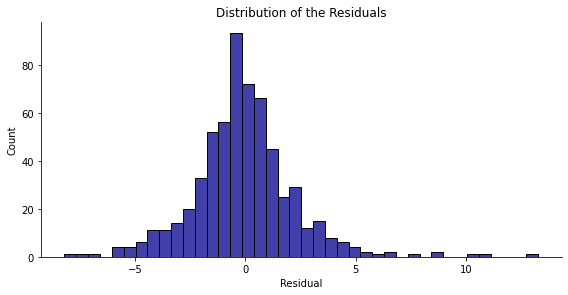

In [ ]:
# Plot for Distribution of residuals

sns.displot(y_pred_RFTRF - y_test, color = "darkblue", aspect = 2, height = 4)
plt.title('Distribution of the Residuals')
plt.xlabel('Residual')
plt.show()

#### Prediction on final test set for Kaggle

In [ ]:
# Predict labels on test dataset for kaggle
pred_rftrf = model_RFTRF.predict(test_rftrf)

In [ ]:
# Prepare .csv file according to kaggle evaluation
final = pd.DataFrame()
final['id'] = id
final['revenue'] = np.expm1(pred_rftrf)
final.to_csv('submission_rffor.csv', index=False)

Kaggle Submission Score
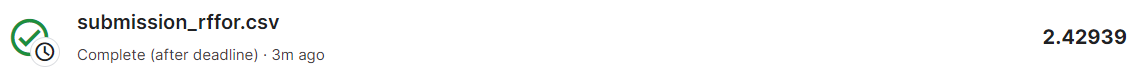

### Sequential Feature Backward Selection and Random Forest Tree Regressor

The backward feature selection for Random Forest Tree Regressor is carried out using Sequential backward feature selection library wrapper from scikit-learn. It was found that 10 features were selected after performing wrapper method and scoring was kept as root mean square log error and cross-validation to 5 while selection of features. The train and test data for RFTR were separated based on the feature selected by backward feature selection.

In [ ]:
# Object for Sequential backward feature selection
sfsb = SFS(RandomForestRegressor(random_state=42), direction='backward',
            scoring='neg_mean_squared_log_error', cv=5)

# Fit RFTR Sequential backward Feature Selection on training data
features_rftrb = sfsb.fit(X_train, y_train)

# Note: It takes 9-10 min to fit the model
# timing can be minimized by keeping n_estimators and max_depth less, but it increased the RSME score

In [ ]:
# Get indices of features selected for RFTR Backward
rftrb_feature_indices = features_rftrb.get_support(indices = True)
X_train_rftrb = X_train.iloc[ : , rftrb_feature_indices]
X_test_rftrb = X_test.iloc[ : , rftrb_feature_indices]

rftrb_feature_cols = X_train_rftrb.columns
print(f'Features selected for RFTR Backward: {rftrb_feature_cols}')
test_rftrb = test.iloc[ : , rftrb_feature_indices]

Features selected for RFTR Backward: Index(['belongs_to_collection', 'homepage', 'production_usa', 'monday',
       'wednesday', 'friday', 'has_keywords', 'budget_log', 'runtime_log',
       'length_title_log'],
      dtype='object')


#### Model Build and Evaluation

The model build process is done with Random Forest Tree Regressor. Only the predictors selected after backward feature selection are used. Similar to Model 1 and 2, looking at the plot and RMSE value, our model can be improved because there are lot of outliers.

In [ ]:
# RFTR Backward Model Fitting

model_RFTRB = RandomForestRegressor(random_state=42)
model_RFTRB.fit(X_train_rftrb, y_train)

# Prediction on test set

y_pred_RFTRB = model_RFTRB.predict(X_test_rftrb)
metric(y_pred_RFTRB, y_test)

Root Mean Squared Error:  2.1982


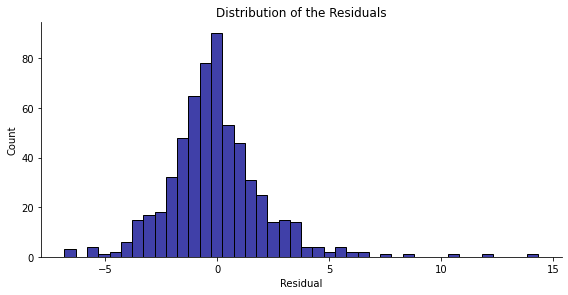

In [ ]:
# Plot for Distribution of residuals

sns.displot(y_pred_RFTRB - y_test, color = "darkblue", aspect = 2, height = 4)
plt.title('Distribution of the Residuals')
plt.xlabel('Residual')
plt.show()

#### Prediction on final test set for Kaggle

In [ ]:
# Predict labels on test dataset for kaggle
pred_rftrb = model_RFTRB.predict(test_rftrb)

In [ ]:
# Prepare .csv file according to kaggle evaluation
final = pd.DataFrame()
final['id'] = id
final['revenue'] = np.expm1(pred_rftrb)
final.to_csv('submission_rfback.csv', index=False)

Kaggle Submission Score
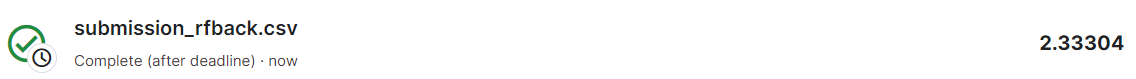

# IV Interpretations

## Model Feature Importance

Model is evaluated based on property feature_importances_ in Random Forest Tree Regressor, also known as  variance reduction for regressor. Random Forest Tree is a collection of Decision Trees. There are internal nodes and leaves in every decision tree. The internal node uses the chosen characteristic to decide how to split the data set into two different sets with similar responses. The criteria used to choose the features for internal nodes is variance reduction for regressors. So, to summarize, the higher feature importance, the more important the feature. It is important to note that the sum of each feature importance of feature used for modeling adds up to one.

In [ ]:
# Method for Model Feature Importance
def model_importance(model, feature_cols, X_train):
  feature_importances = model.feature_importances_
  index = np.argsort(feature_importances)[::-1]
  for feature in range(len(feature_cols)):
    print("%s - (%f)" % (X_train.columns[index[feature]], feature_importances[index[feature]]))

All 20 features were used for Model 1. The below feature importance values in Model 1 shows that budget(42%), runtime(11%) and total cast(10%) tend to have larger impact on the Model 1, whereas release week features and language of film tend to show a less impact. Also, the possibility of generating revenue remains high depending on movie title length(7%) and number of studios(4%). It was interesting to see that having a tagline contributed to 3% on the movie's success and also genres played an important role contributing to 3.3%.

In [ ]:
# Model Feature Importance for Model 1

print("Model Feature Importance for Model 1")
model_importance(model_RFTR, X_train.columns, X_train)

Model Feature Importance for Model 1
budget_log - (0.421526)
runtime_log - (0.111665)
total_cast_log - (0.102125)
length_title_log - (0.079807)
num_studios_log - (0.049168)
num_genres_log - (0.033956)
tagline_check - (0.030249)
belongs_to_collection - (0.025519)
total_languages_log - (0.023086)
homepage - (0.016408)
production_usa - (0.014766)
has_keywords - (0.014412)
thursday - (0.012110)
friday - (0.011648)
monday - (0.011297)
saturday - (0.010407)
english_lang - (0.008929)
wednesday - (0.008124)
tuesday - (0.007642)
sunday - (0.007156)


We found that 10 features are chosen for Model 2 and Model 3 after doing Sequential Forward Feature Selection and Sequential Backward Feature Selection on each method with Random Forest Tree Regressor to determine the best predictors for model fitting. Out of those 10, seven features—"budget_log," "belongs_to_collection," "production_usa," "has_keywords," "friday," "wednesday," and "monday"—are shared by both approaches.  

The below feature importance values in Model 2 shows that budget(70%) tend to have much larger impact on the Model 2, whereas release week features tend to show a less impact which is similar to Model 1. Although, friday release week of movie contributed to 3% which seems logical due to a typical five-day workweek. Having a tagline, keywords and belonging to a collection also contributed to almost 4-5% in the movie's success for Model 2.

In [ ]:
# Model Feature Importance for Model 2

print("Model Feature Importance for Model 2")
model_importance(model_RFTRF, rftrf_feature_cols, X_train_rftrf)

Model Feature Importance for Model 2
budget_log - (0.707588)
tagline_check - (0.055421)
belongs_to_collection - (0.044080)
production_usa - (0.040489)
has_keywords - (0.035819)
friday - (0.031284)
wednesday - (0.025263)
tuesday - (0.023996)
monday - (0.020995)
sunday - (0.015066)


The Model 3 feature importance ratings below show that release week features, having keywords, and having homepage likely to have less of an influence than budget(46%), runtime(20%), and movie title length(13%) do. Also, the possibility of generating revenue remains less depending on having homepage(2.9%), film produced in usa(2.9%) and movie belonging to a collection(3.5%). Similar to Model 1, if the movie has keywords, the feature has a minimal effect on the model of over 2%. It seemed a bit odd, mostly film makes maximum revenue on weekends, but no weekend release features were selected after backward elimination.

In [ ]:
# Model Feature Importance for Model 3

print("Model Feature Importance for Model 3")
model_importance(model_RFTRB, rftrb_feature_cols, X_train_rftrb)

Model Feature Importance for Model 3
budget_log - (0.468212)
runtime_log - (0.201506)
length_title_log - (0.154491)
belongs_to_collection - (0.035728)
homepage - (0.028971)
production_usa - (0.028539)
friday - (0.026320)
has_keywords - (0.025919)
wednesday - (0.015330)
monday - (0.014984)


## Conclusion

For all the three models, budget of movie tend to have large impact and plays crucial role in the success of a movie. With a RSMLE score of 2.219 on Kaggle, the Model 1 having Random Forest Tree Regressor using all predictors appears to have outperformed the Model 2 and Model 3 for this regression problem which used forward and backward feature selection approach. However, maybe we think that further exploaration can be done on the features such as cast and crew to check if the score for each model can be improved.

# V References

- Sequential Feature Selector: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
- Exploratory Analysis: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
- Kaggle discussion: https://www.kaggle.com/competitions/tmdb-box-office-prediction/discussion/79723
- Random Forest Regressor: https://towardsdatascience.com/random-forest-regression-5f605132d19d
- Random Forest Feature Importance: https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=Random%20Forest%20Built%2Din%20Feature%20Importance&text=It%20is%20a%20set%20of,sets%20with%20similars%20responses%20within
- Decision Tree Regression: https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why
- Train Test Split: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
- The Movie Database(TMDB): https://www.themoviedb.org/
- TMDB Open API: https://www.themoviedb.org/documentation/api
